In [1]:
import sys
sys.path.append("../../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 5
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)-sindhi'
MODEL_NAME = 'bert-base-multilingual-uncased'
dir = '../../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'
class_names = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_df = train_df[train_df['class'] != 0]
val_df = val_df[val_df['class'] != 0]
test_df = test_df[test_df['class'] != 0]

train_texts = train_df['sindhi_text'].values
val_texts = val_df['sindhi_text'].values
test_texts = test_df['sindhi_text'].values

train_labels = train_df[class_names].values
val_labels = val_df[class_names].values
test_labels = test_df[class_names].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

توهان ڪير ڄاڻو ٿا ته موجون گهٽ لڙ ۾ ٺاهيندا آهن?  dbo’d yo bitch هاڻي هوءَ اسان جي ٻنهي (nigga) [0 0 0 1 0]
اها ڪچي مڪمل نظر اچي ٿي https://t.co/L17zFSuqGQ [0 1 0 0 0]
اسان هاڻي سڀني پليٽ فارمن تي آهيون، تنهنڪري ايندڙ ڀيري توهان هڪ خراب ڪچي، هڪ خوبصورت عورت، جيڪو توهان چاهيو ٿا. راند ڪريو FIHTEEN ته جيئن هوء توهان کي مختلف ڄاڻي سگهي [0 1 0 0 0]
بس هڪ وار ڪٽيو، ڪو به مون کي منهنجي ڪچي مان وٺي سگهي ٿو [0 1 0 0 0]
@barnlife5 @realShawNshawN @grantstern جيڪڏهن توهان سڀ ڪجهه محسوس ڪيو ته پوءِ اهو ڪريو.  ٽرمپ وٽ بالز آهن جيڪي ڪرڻ لاءِ جمهوريت پسند چاهين ٿا ته اهي ڪري سگهن.  پر لبرل ۽ جمهوريت پسند نرم آهن ۽ منسوخ ٿيڻ کان خوفزده آهن يا اهي پري کاٻي پاسي نه جهڪندا آهن!! 😂😂Y' سڀ گونگا آهن جيئن ته اهو مزاحيه آهي [0 0 0 1 0]


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="sindhi")
    , train_labels[i])

ڄاڻو ٿا ته موجون گهٽ لڙ ۾ ٺاهيندا dbo’d yo bitch هاڻي هوءَ اسان جي ٻنهي nigga [0 0 0 1 0]
اها ڪچي مڪمل نظر اچي ٿي [0 1 0 0 0]
اسان هاڻي سڀني پليٽ فارمن آهيون، تنهنڪري ايندڙ ڀيري خراب ڪچي، خوبصورت عورت، جيڪو چاهيو ٿا راند ڪريو fihteen ته هوء کي ڄاڻي سگهي [0 1 0 0 0]
بس وار ڪٽيو، ڪو مون کي منهنجي ڪچي وٺي سگهي ٿو [0 1 0 0 0]
barnlife5 realshawnshawn grantstern جيڪڏهن سڀ ڪجهه محسوس ڪيو ته پوءِ ڪريو ٽرمپ وٽ بالز جيڪي لاءِ جمهوريت پسند چاهين ٿا ته ڪري سگهن پر لبرل جمهوريت پسند نرم منسوخ کان خوفزده يا پري کاٻي نه جهڪندا 😂😂y سڀ گونگا ته مزاحيه آهي [0 0 0 1 0]


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="sindhi") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="sindhi") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="sindhi") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import BertTokenizer, BertForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 241/241 [01:26<00:00,  2.80it/s, loss=0.116] 


Train loss 0.20766314255127769 accuracy 0.7123211963589077
Validation loss 0.1387853533213521 accuracy 0.8442559001365321
Model and tokenizer saved at epoch 0
Checkpoint saved: Improved validation accuracy at epoch 0: 0.8442559001365321
Epoch 1/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.83it/s, loss=0.0795]


Train loss 0.1277203353670623 accuracy 0.8372236671001301
Validation loss 0.12016586159114484 accuracy 0.8371367271308757
No improvement in validation accuracy for 1 epochs.
Epoch 2/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.82it/s, loss=0.0548]


Train loss 0.11054930489711247 accuracy 0.8595903771131339
Validation loss 0.11718050997566294 accuracy 0.8295299395357909
No improvement in validation accuracy for 2 epochs.
Epoch 3/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.83it/s, loss=0.0297]


Train loss 0.09628256483011226 accuracy 0.877925877763329
Validation loss 0.12950870468292708 accuracy 0.857421494051102
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.857421494051102
Epoch 4/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.82it/s, loss=0.0361]


Train loss 0.08512012994388327 accuracy 0.8967165149544863
Validation loss 0.1390110190819811 accuracy 0.8401599375853326
No improvement in validation accuracy for 1 epochs.
Epoch 5/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.83it/s, loss=0.035] 


Train loss 0.0752309090631755 accuracy 0.912483745123537
Validation loss 0.1616784064674083 accuracy 0.8378193875560757
No improvement in validation accuracy for 2 epochs.
Epoch 6/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.83it/s, loss=0.0169]


Train loss 0.06614513205232957 accuracy 0.9265279583875162
Validation loss 0.1343353595814587 accuracy 0.8658084649892724
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.8658084649892724
Epoch 7/50
----------


Training Progress: 100%|██████████| 241/241 [01:27<00:00,  2.76it/s, loss=0.0262]


Train loss 0.05594513574962918 accuracy 0.9413849154746424
Validation loss 0.14803334279560748 accuracy 0.8733177296664716
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.8733177296664716
Epoch 8/50
----------


Training Progress: 100%|██████████| 241/241 [01:28<00:00,  2.73it/s, loss=0.0126]


Train loss 0.05016247396013425 accuracy 0.9481144343302991
Validation loss 0.148413724001543 accuracy 0.8731226838307002
No improvement in validation accuracy for 1 epochs.
Epoch 9/50
----------


Training Progress: 100%|██████████| 241/241 [01:26<00:00,  2.80it/s, loss=0.00981]


Train loss 0.042018275124434366 accuracy 0.9580299089726918
Validation loss 0.17242190444175107 accuracy 0.8641505753852156
No improvement in validation accuracy for 2 epochs.
Epoch 10/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.82it/s, loss=0.00967]


Train loss 0.03753463609561448 accuracy 0.9625487646293888
Validation loss 0.1795590435281212 accuracy 0.8589818607372732
No improvement in validation accuracy for 3 epochs.
Epoch 11/50
----------


Training Progress: 100%|██████████| 241/241 [01:25<00:00,  2.80it/s, loss=0.00412]


Train loss 0.03021833581919492 accuracy 0.9707087126137841
Validation loss 0.19053150851417472 accuracy 0.8657109420713868
No improvement in validation accuracy for 4 epochs.
Epoch 12/50
----------


Training Progress: 100%|██████████| 241/241 [01:26<00:00,  2.79it/s, loss=0.0102] 


Train loss 0.027762301656498702 accuracy 0.9735370611183355
Validation loss 0.20846270972195965 accuracy 0.86268773161693
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


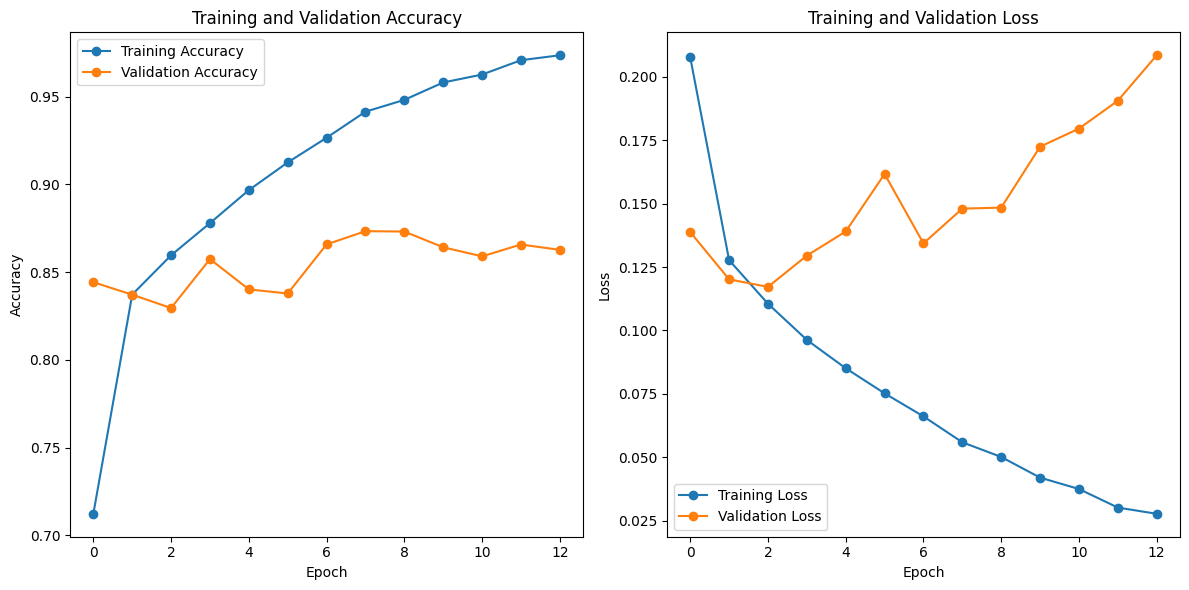

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc:.2f} Test Loss: {test_loss}')

Test Accuracy: 0.86 Test Loss: 0.20903699826679112


Accuracy: 0.87
F1 Score: 0.86
Precision: 0.86
Recall: 0.87

Classification Report:
                    precision    recall  f1-score   support

        Disability       0.38      0.20      0.26       128
     Gender/Sexual       0.83      0.87      0.85      3298
Origin/Nationality       0.48      0.52      0.50       123
    Race/Ethnicity       0.90      0.85      0.87      3657
          Religion       0.89      0.93      0.91      3048

          accuracy                           0.87     10254
         macro avg       0.70      0.67      0.68     10254
      weighted avg       0.86      0.87      0.86     10254



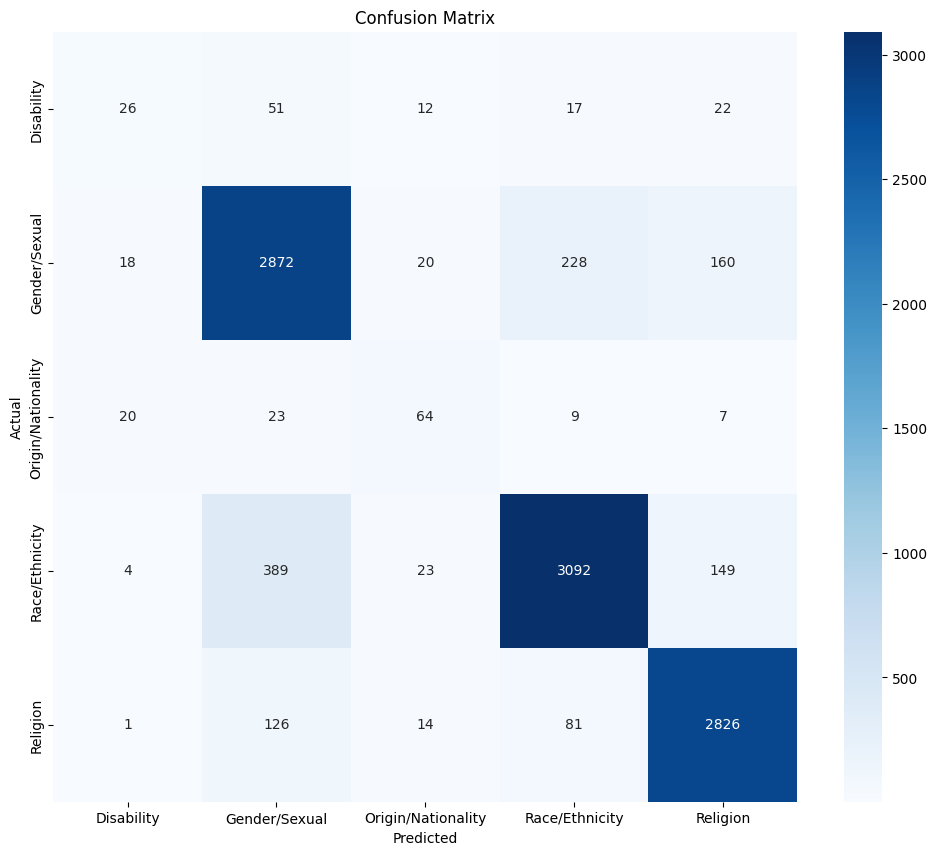

In [11]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Origin/Nationality with confidence: 0.99
